# Part II - Airline On-Time Performance Data
## by Hiba Chafroud


## Investigation Overview


Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.Here i am going to show flights registation per weekdays,months, hours and  airlines. I will also focus on early flights and the desribution of delay values, delays per days,hours and per airlines.


## Dataset Overview


The data that I will worked consists of 4 csv files;

* 'airport.csv' contains data about airports.
* 'flights-2008.csv' contains data about flighs in the year 2008 ,such as departure and arriavale time, flight number , cancelation and others.
* 'carriers.csv' contains data about airlines.
* 'plane-data.csv' contains data about planes such as tail number, model rngine type and others. 


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime


%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
airports_copy = pd.read_csv('airports.csv')
flights_2008_copy = pd.read_csv('2008.csv')
carriers_copy = pd.read_csv('carriers.csv')
plane_data_copy = pd.read_csv('plane-data.csv')


In [5]:
#data wargling steps
flights_2008_copy.drop_duplicates(inplace=True)
flights_2008_copy.dropna(subset=['DepTime'], inplace=True)
flights_2008_copy.dropna(subset=['ArrTime'], inplace=True)
plane_data_copy.dropna(subset=['type'], inplace=True) 
carriers_copy.dropna(subset=['Code'], inplace=True) 
airports_copy.dropna(subset=['city'], inplace=True) 
flights_2008_copy.drop(['TaxiIn','TaxiOut'], axis=1, inplace=True)

flights_2008_copy.drop(['CarrierDelay','WeatherDelay', 'NASDelay','SecurityDelay','LateAircraftDelay','CancellationCode'], axis=1, inplace=True)



In [10]:
ordinal_var_dict = {
    'state': ['MS', 'TX', 'CO', 'NY', 'FL', 'AL', 'WI', 'OH', 'MO', 'MN', 'IN',
       'NV', 'IL', 'ND', 'MI', 'NE', 'GA', 'DC', 'TN', 'AK', 'ME', 'MA',
       'VT', 'SD', 'NM', 'OK', 'KS', 'KY', 'IA', 'AR', 'LA', 'CA', 'WA',
       'VA', 'AZ', 'PA', 'NJ', 'OR', 'NC', 'UT', 'MT', 'ID', 'CT', 'SC',
       'NH', 'MD', 'DE', 'WV', 'WY', 'PR', 'RI', 'AS', 'CQ', 'GU',
       'HI', 'VI'],
                    'country': ['USA']
                   }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    airports_copy[var] = airports_copy[var].astype(ordered_var)

In [11]:
               
def hm(x):
    if (x == 2400.0):#the problem of 2400.0 is that it won't convert it to 00:00:00
        return(datetime.strptime('0'.strip().zfill(4), "%H%M").time())
    else :
        return(datetime.strptime(str(int(float(x))).strip().zfill(4), "%H%M").time())

In [12]:

flights_2008_copy['DepTime'] = flights_2008_copy['DepTime'].apply(lambda x: hm(x))
flights_2008_copy['CRSDepTime'] = flights_2008_copy['CRSDepTime'].apply(lambda x: hm(x))

flights_2008_copy['ArrTime'] = flights_2008_copy['ArrTime'].apply(lambda x: hm(x))
flights_2008_copy['CRSArrTime'] = flights_2008_copy['CRSArrTime'].apply(lambda x: hm(x))

In [13]:

# creating values to be mapped
map_month = {1 : "January", 2 : "February", 3:"March" , 4:"April ", 5:"May" , 6:"Jun" , 7:"July" ,
           8:"August" , 9:"September" , 10:"October" , 11:"November" , 12:"December"}

# mapping each value to it's respective column
flights_2008_copy.Month = flights_2008_copy.Month.map(map_month)

map_day = {1 : "Monday", 2 : "Tuesday", 3:"Wednesday" , 4:"Thursday", 5:"Friday" , 6:"Saturday" , 7:"Sunday" }

flights_2008_copy.DayOfWeek = flights_2008_copy.DayOfWeek.map(map_day)

In [14]:
ordinal_var_dict = {
    'DayOfWeek': ["Monday", "Tuesday", "Wednesday" , "Thursday", "Friday" , "Saturday" , "Sunday" ],
                    'Month': ["January", "February", "March" , "April ", "May" , "Jun" , "July" ,
           "August" , "September" , "October" , "November" , "December"],
    "DayofMonth": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
                   }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    flights_2008_copy[var] = flights_2008_copy[var].astype(ordered_var)

In [15]:

DayOfWeek = ["Monday", "Tuesday", "Wednesday" , "Thursday", "Friday" , "Saturday" , "Sunday" ]
Month = ["January", "February", "March" , "April ", "May" , "Jun" , "July" ,
           "August" , "September" , "October" , "November" , "December"]
DayofMonth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
               

In [16]:

               
flights_2008_copy.Cancelled = flights_2008_copy.Cancelled.apply(lambda x: bool(x))
flights_2008_copy.Diverted = flights_2008_copy.Cancelled.apply(lambda x: bool(x))

flights_2008_copy['UniqueCarrier'] = flights_2008_copy['UniqueCarrier'].astype('category')
flights_2008_copy['Origin'] = flights_2008_copy['Origin'].astype('category')
flights_2008_copy['Dest'] = flights_2008_copy['Dest'].astype('category')


## Number of flights per days of week


On weekends , flights registarion is at its lowest compared to weekdays.

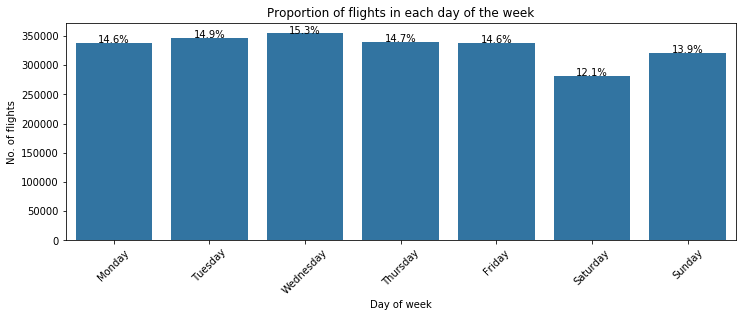

In [17]:
day_counts = flights_2008_copy['DayOfWeek'].value_counts()
day_counts
plt.rcParams["figure.figsize"] = (12,4)

sb.countplot(data=flights_2008_copy, x='DayOfWeek', color = sb.color_palette()[0]);


plt.ylabel('No. of flights')
plt.xlabel('Day of week')
plt.title('Proportion of flights in each day of the week')

day_sum = day_counts.sum()

locs, labels = plt.xticks(rotation=45)
ylocs, ylabels = plt.yticks()

for loc, label in zip(locs, labels):

    count = day_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/day_sum)

    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

plt.show()

## Number of flights per month


There isn't much to say about number of flights per month since we don't have full year records.

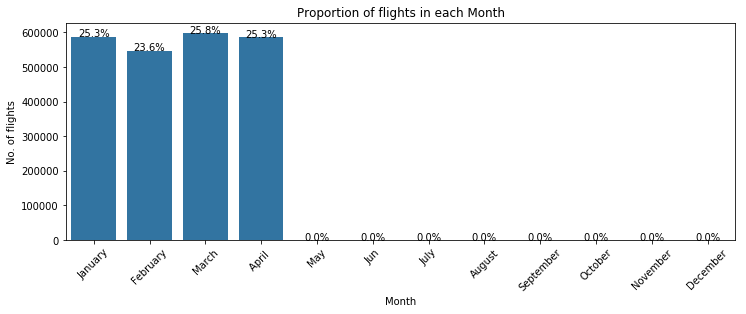

In [18]:
month_counts = flights_2008_copy['Month'].value_counts()
month_counts
plt.rcParams["figure.figsize"] = (12,4)

sb.countplot(data=flights_2008_copy, x='Month', color = sb.color_palette()[0]);


plt.ylabel('No. of flights')
plt.xlabel('Month')
plt.title('Proportion of flights in each Month')

month_sum = month_counts.sum()

locs, labels = plt.xticks(rotation=45)
ylocs, ylabels = plt.yticks()

for loc, label in zip(locs, labels):

    count = month_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/month_sum)

    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

plt.show()

#  Number of flights per hour in day.

Flights registation is nearly zero from midnight to 5Am , it has high delay pecentage too (nearly 80%).


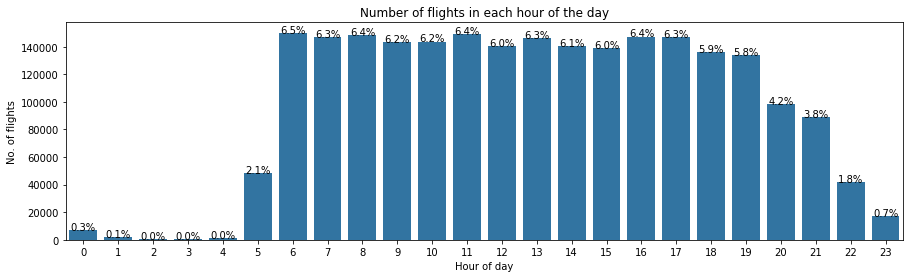

In [19]:
flights_2008_copy['DepTimeHour'] = flights_2008_copy.DepTime.apply(lambda x :x.hour) #we creat w new column to seperate the departure hour from the time
hour_count = flights_2008_copy['DepTimeHour'].value_counts()
plt.rcParams["figure.figsize"] = (15,4)

sb.countplot(data=flights_2008_copy, x='DepTimeHour', color = sb.color_palette()[0]);


plt.ylabel('No. of flights')
plt.xlabel('Hour of day')
plt.title('Number of flights in each hour of the day')

hour_sum = hour_count.sum()

locs, labels = plt.xticks()
ylocs, ylabels = plt.yticks()

for loc, label in zip(locs, labels):

    count = hour_count[int(label.get_text())]
    pct_string = '{:0.1f}%'.format(100*count/hour_sum)

    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')


plt.show()

#  Number of flights per Airlines.

Southwest Airlines Co. had the most registered flights (393,732flights) but when compared to airlines delay, it had the least percentage of on-time and early flights.

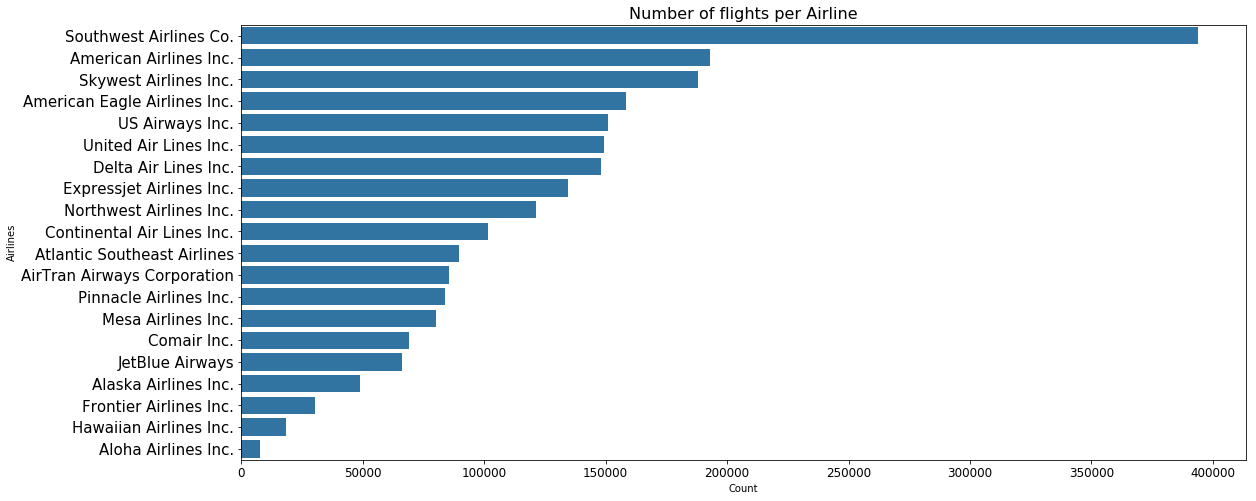

In [21]:
flights_2008_copy = pd.merge(left=flights_2008_copy, right=carriers_copy, how='left', left_on='UniqueCarrier', right_on='Code')

name = flights_2008_copy.query("Description == 'US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)'")
idx = name.index
flights_2008_copy.iloc[idx,23] = 'US Airways Inc.'
# number of flights per airline
df_airline = pd.DataFrame({'count' : flights_2008_copy.groupby(flights_2008_copy.Description).size()}).reset_index()
# sorting by decreasing count
df_airline.sort_values('count', ascending=False, inplace=True)
df_airline= df_airline.rename(columns={"Description": "Airline company"})
# plot the number of  flights per airline
f, ax = plt.subplots(figsize=(18, 8))
sb.barplot(x ="count",
            y="Airline company",
            data=df_airline,
            color = sb.color_palette()[0],
            ax=ax)


plt.xticks(size = 12)
plt.yticks(size = 15)


# set plot's labels
ax.set(xlabel='Count', ylabel='Airlines')
ax.set_title("Number of flights per Airline", size=16)


plt.show()

# Early flights?
Flights do really take off early and that is represented with the negative values. 
An interesting pattern in flight delays, where there is a large peak around a single decimal value(0), then a gradual tailing off to the right until the next peak. This can ensure us that there isn't much delayed flights ,but yet an important amount of flights take off before 10 min of its actual time .

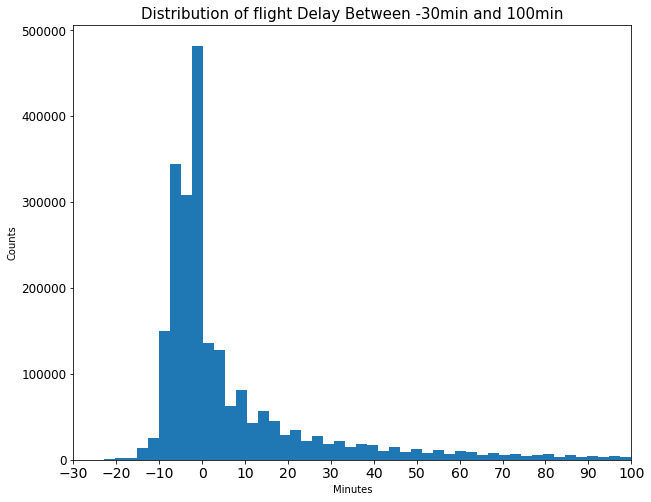

In [22]:
plt.rcParams["figure.figsize"] = (10,8)
ticks = [-30, -10,-3 , 0, 10, 3, 30,100 ]
labels = ['{}'.format(v) for v in ticks]

plt.hist(data=flights_2008_copy, x='DepDelay', bins=1000)
plt.xlim(-30,100)
plt.xticks(np.arange(-30,101,10))
plt.title('Distribution of flight Delay Between -30min and 100min',fontsize=15)
plt.ylabel('Counts')
plt.xlabel('Minutes')
plt.xticks(size = 14)
plt.yticks(size = 12)
plt.show()

# Percentage of delayed per days
The percentage of delayed flights is higher in the middle of the week (Friday), while it decreases on weekend(Saturday and Dunday).Notice that Wednesday which has the highest number of flights,has the lowest delayed flights.


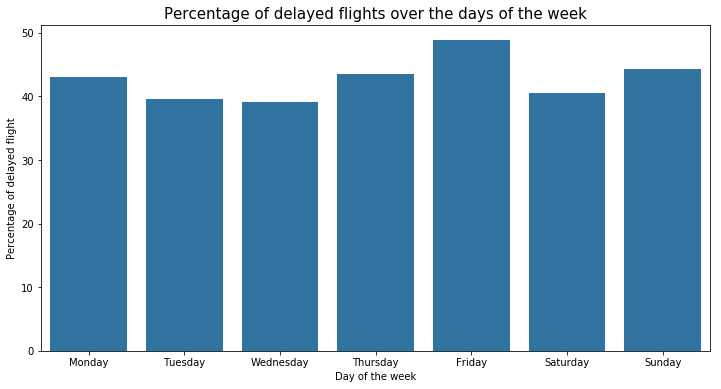

In [23]:
df_dayweek_delayed =  pd.DataFrame({'count' : flights_2008_copy[flights_2008_copy.DepDelay > 0].groupby('DayOfWeek').size()}).reset_index()
df_dayweek= pd.DataFrame({'count' : flights_2008_copy.groupby('DayOfWeek').size()}).reset_index()
df_dayweek_delayed['percentage']=df_dayweek_delayed['count']*100/df_dayweek['count']
# plot the number of delayed flights per day of the week
f, ax = plt.subplots(figsize=(12, 6))
sb.barplot(x="DayOfWeek",
            y="percentage",
            data=df_dayweek_delayed,
            color = sb.color_palette()[0],
            ax=ax)
plt.xticks(size = 10)
plt.yticks(size = 10)

# set plot's labels
ax.set(xlabel='Day of the week', ylabel='Percentage of delayed flight')
ax.set_title("Percentage of delayed flights over the days of the week", size=15)

plt.show()

# Percentage of delayed flight per hours

In particular we have hight number in the period after midnight and a remarkable drop between 4 and 5 AM then continue to increase until the peak in 1AM.

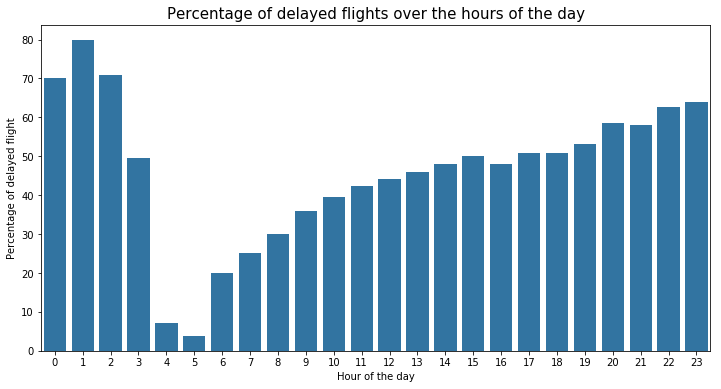

In [24]:
df_hour_delayed =  pd.DataFrame({'count' : flights_2008_copy[flights_2008_copy.DepDelay > 0].groupby('DepTimeHour').size()}).reset_index()
df_hour= pd.DataFrame({'count' : flights_2008_copy.groupby('DepTimeHour').size()}).reset_index()
df_hour_delayed['percentage']=df_hour_delayed['count']*100/df_hour['count']
# plot the number of delayed flights per hour of the day
f, ax = plt.subplots(figsize=(12, 6))
sb.barplot(x="DepTimeHour",
            y="percentage",
            data=df_hour_delayed,
            color = sb.color_palette()[0],
            ax=ax)
plt.xticks(size = 10)
plt.yticks(size = 10)

# set plot's labels
ax.set(xlabel='Hour of the day', ylabel='Percentage of delayed flight')
ax.set_title("Percentage of delayed flights over the hours of the day", size=15)

plt.show()

# Percent of delay type per Airline
Southwest Airlines which had the most total flights, it turns out that it has the least on-time and early flights (Approx.30%). While Hawaiian Airlines Inc. which comparatively had next to least registered number of flights, turns out to have the most on-time and early flights with a value of Approx.85%.



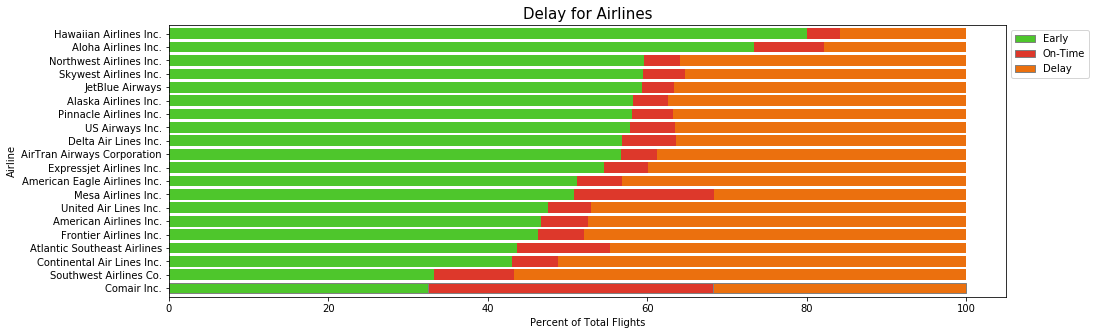

In [28]:
# creat a new dataframe by grouping airline company names and selecting DelyType 
def delay_set(x):
    if (x < 0):
        return('Early')
    elif(x > 0):
            return('Delay')
    else:
        return ('On-Time')
flights_2008_copy['DelyType'] = flights_2008_copy.DepDelay.apply(lambda x :delay_set(x))
df_airline_delayed = flights_2008_copy.groupby('Description')['DelyType'].value_counts(normalize=True).unstack()
# ordering columns
col_order = ['Early', 'On-Time', 'Delay']
df_airline_delayed = df_airline_delayed[col_order]
df_airline_delayed.sort_values(by='Early', ascending=True, inplace=True)
# plot stacked barchart
fig, ax = plt.subplots(figsize=[15,5])
(df_airline_delayed*100).plot(kind='barh', stacked=True, width=0.8,
                                color=colors, ax=ax, edgecolor='grey')
ax.set_title('Delay for Airlines', fontsize=15)
ax.set_xlabel('Percent of Total Flights')
ax.set_ylabel('Airline')
ax.legend(bbox_to_anchor=(1,1))


plt.show();

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 520449 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
